In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

###  The crime rates in 2013 dataset contains a lot of variables that could be made into a modelable binary outcome.  I will use this data set to do the following:

#### Engineer the features
#### Create 3 models.  Each model will be run on a training set and a test-set (potentially, multiple test-sets if the approach taken is a fold approach).

### The 3 models should be:
* Vanilla logistic regression
* Ridge logistic regression
* Lasso logistic regression

In [2]:
main = pd.read_csv('Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2013-2.csv')

In [3]:
main.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ALABAMA,Abbeville,"2,645",11,1.000,1,NaN,2,7,63,21,39,3,NaN,nan,nan,NaN
1,NaN,Adamsville,"4,481",19,1.000,0,NaN,7,11,321,58,252,11,NaN,nan,nan,
2,NaN,Addison,744,1,0.000,1,NaN,0,0,25,6,17,2,NaN,nan,nan,
3,NaN,Alabaster,"31,170",44,0.000,2,NaN,11,31,640,70,544,26,NaN,nan,nan,NaN
4,NaN,Alexander City,"14,692",119,2.000,16,NaN,12,89,661,121,510,30,NaN,nan,nan,NaN


In [4]:
# This is a big dataset with a lot of items that need to be cleaned up.  Let's clean up the data so that we can use it for our models.
crime_main = main.drop([9291, 9292, 9293, 9294, 9295, 9296, 9297, 9298, 9299, 9300])

In [5]:
crime_main.columns

Index(['State', 'City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
columns = ['State','City', 'Population', 'Violent_Crimes', 'Murder_Manslaughter', 'Rape_revdef', 'Rape_olddef', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 
              'Burglary', 'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson', 'Unnamed 14', 'Unnamed 15', 'Unnamed 16']

In [7]:
crime_main.columns=columns
crime_main[columns]=crime_main[columns].replace(',', '', regex=True)
crime_main.drop(["State","Rape_revdef","Unnamed 14","Unnamed 15", "Unnamed 16"], axis = 1, inplace = True) 

In [8]:
crime_main.fillna("")

,City,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
0,Abbeville,2645,11,1.000,,2,7,63,21,39,3,
1,Adamsville,4481,19,1.000,,7,11,321,58,252,11,
2,Addison,744,1,0.000,,0,0,25,6,17,2,
3,Alabaster,31170,44,0.000,,11,31,640,70,544,26,
4,Alexander City,14692,119,2.000,,12,89,661,121,510,30,
5,Aliceville,2419,7,0.000,,2,5,48,16,26,6,
6,Andalusia,9079,34,1.000,,6,23,491,95,379,17,
7,Anniston,22648,461,5.000,,78,339,1988,770,1120,98,
8,Arab,8295,32,0.000,,4,23,640,166,414,60,
9,Ardmore,1304,2,0.000,,0,2,31,7,23,1,


In [9]:
crime_main.shape

(9292, 12)

In [10]:
# What kind of data do I have?
crime_main.dtypes

City                    object
Population              object
Violent_Crimes          object
Murder_Manslaughter    float64
Rape_olddef             object
Robbery                 object
Aggravated_Assault      object
Property_Crime          object
Burglary                object
Larceny_Theft           object
Motor_Vehicle_Theft     object
Arson                   object
dtype: object

### We have multiple columns that are objects.  For our model to work a little smoother, converting objects to floats will be crucial.

In [11]:
crime_main = crime_main.dropna(how='any')

In [12]:
crime_main[['Population','Violent_Crimes','Murder_Manslaughter','Rape_olddef','Robbery','Aggravated_Assault','Property_Crime','Burglary','Larceny_Theft','Motor_Vehicle_Theft','Arson']] = crime_main[['Population','Violent_Crimes','Murder_Manslaughter','Rape_olddef','Robbery','Aggravated_Assault','Property_Crime','Burglary','Larceny_Theft','Motor_Vehicle_Theft','Arson']].apply(pd.to_numeric, errors='coerce')

In [13]:
crime_main.dtypes

City                    object
Population               int64
Violent_Crimes           int64
Murder_Manslaughter    float64
Rape_olddef              int64
Robbery                  int64
Aggravated_Assault       int64
Property_Crime           int64
Burglary                 int64
Larceny_Theft            int64
Motor_Vehicle_Theft      int64
Arson                    int64
dtype: object

In [14]:
crime_main.describe()

,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
count,3577.000,3577.000,3577.000,3577.000,3577.000,3577.000,3577.000,3577.000,3577.000,3577.000,3577.000
mean,27326.480,111.441,1.331,6.903,38.840,64.368,860.384,183.403,592.569,84.412,4.620
std,106736.873,671.883,9.119,34.116,293.878,351.967,3950.154,861.598,2639.891,523.164,32.362
min,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2889.000,3.000,0.000,0.000,0.000,2.000,47.000,10.000,34.000,1.000,0.000
50%,7677.000,12.000,0.000,1.000,2.000,8.000,164.000,32.000,121.000,6.000,0.000
75%,21828.000,47.000,0.000,4.000,11.000,30.000,548.000,109.000,403.000,26.000,2.000
max,3878725.000,20993.000,251.000,764.000,9891.000,10270.000,110919.000,23733.000,73591.000,14382.000,1430.000


In [15]:
# Due to outliers, retain data by turning some parameters as categorical data. 
crime_main['Murder_categorical'] = np.where(crime_main.loc[:, 'Murder_Manslaughter']>0, 1, 0) 
crime_main['Robbery_categorical'] = np.where(crime_main.loc[:, 'Robbery']>0, 1, 0) 
crime_main['Violent_categorical'] = np.where(crime_main.loc[:, 'Violent_Crimes']>0, 1, 0) 

#### We will go 1 step further and remove some large outliers in our data.  This will allow it to look more normalized.

In [16]:
crime_main = crime_main.query('Population<20000')
crime_main = crime_main.query('Rape_olddef<500')
crime_main = crime_main.query('Burglary<500')
crime_main = crime_main.query('Larceny_Theft<500')
crime_main = crime_main.query('Aggravated_Assault<500')
crime_main = crime_main.query('Motor_Vehicle_Theft<500')

In [17]:
crime_main.describe()

,Population,Violent_Crimes,Murder_Manslaughter,Rape_olddef,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson,Murder_categorical,Robbery_categorical,Violent_categorical
count,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000,2507.000
mean,5910.473,13.004,0.124,1.176,2.392,9.311,134.762,29.250,99.132,6.380,0.613,0.097,0.522,0.864
std,4842.952,19.833,0.435,2.333,5.277,15.342,144.714,37.027,107.857,12.023,1.624,0.295,0.500,0.343
min,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2030.000,2.000,0.000,0.000,0.000,1.000,30.000,6.000,20.000,0.000,0.000,0.000,0.000,1.000
50%,4363.000,6.000,0.000,0.000,1.000,4.000,80.000,16.000,57.000,2.000,0.000,0.000,1.000,1.000
75%,8511.000,16.000,0.000,1.000,3.000,11.000,191.000,38.000,141.000,7.000,1.000,0.000,1.000,1.000
max,19999.000,212.000,6.000,31.000,119.000,189.000,880.000,425.000,498.000,175.000,28.000,1.000,1.000,1.000


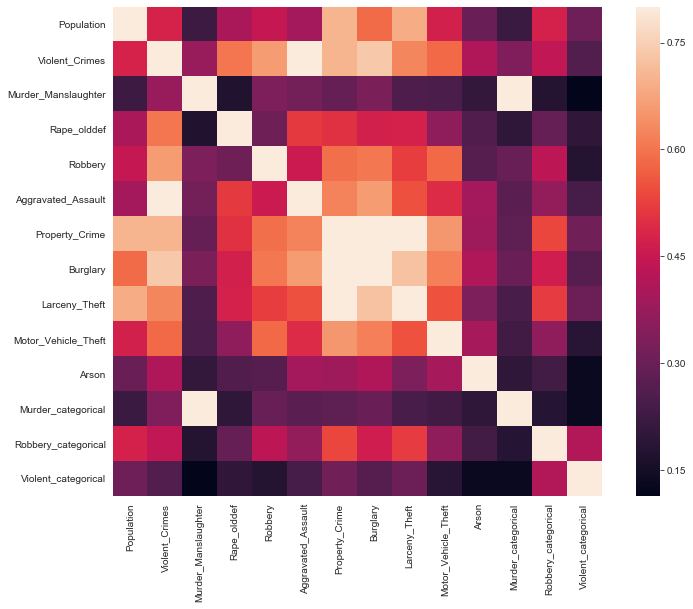

In [18]:
corrmat = crime_main.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.set_style('darkgrid')
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Voila!  The dataset looks a lot cleaner and normalized than what we started with.  Time to make some models.

## Vanilla Logistic Regression

In [19]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [20]:
crimedata = list(crime_main.loc[:,'Violent_Crimes':'Arson'])

In [21]:
crime_main['Total_crimes'] = crime_main[crimedata].sum(axis = 1)

In [22]:
crime_main['Crime_per_capita']= crime_main['Total_crimes']/crime_main['Population']

In [23]:
crime_main['Crime_per_capita'].argmax()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


870

In [24]:
crime_main.ix[crime_main['Crime_per_capita'].argmax()]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


City                   Vernon
Population                115
Violent_Crimes             22
Murder_Manslaughter     0.000
Rape_olddef                 0
Robbery                    13
Aggravated_Assault          9
Property_Crime            321
Burglary                   28
Larceny_Theft             187
Motor_Vehicle_Theft       106
Arson                       0
Murder_categorical          0
Robbery_categorical         1
Violent_categorical         1
Total_crimes          686.000
Crime_per_capita        5.965
Name: 870, dtype: object

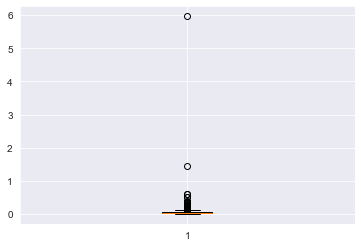

In [25]:
plt.boxplot(crime_main['Crime_per_capita'])
plt.show()

In [26]:
crime_main[crime_main['Crime_per_capita']>1].Crime_per_capita.count()

2

In [27]:
crime_main[crime_main['Crime_per_capita']>1].index

Int64Index([870, 2183], dtype='int64')

In [29]:
crime_main = crime_main.drop([870, 2183])

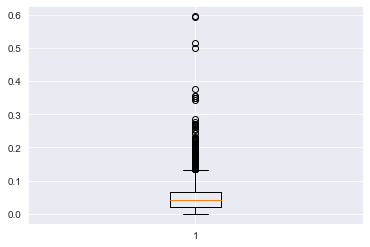

In [30]:
plt.boxplot(crime_main['Crime_per_capita'])
plt.show()

#### I want to see what the crime per capita for the cities are

In [31]:
crime_main['Crime_per_capita'].describe()

count   2505.000
mean       0.051
std        0.047
min        0.000
25%        0.022
50%        0.040
75%        0.067
max        0.595
Name: Crime_per_capita, dtype: float64

#### This is interesting.  By looking at the dataset, we see that close to 2% of the cities are not showing reported crime.  It would be nice to live in one of these places.  

In [32]:
crime_main[crime_main['Crime_per_capita']==0].Crime_per_capita.count()/len(crime_main)

0.015968063872255488

#### Let's make a variable for us to use as a target.  We will say that cities that have less than 0.022 (which is in the top 25%) are what we will classify as our safe places to live.

In [33]:
crime_main['Safe'] = np.where(crime_main['Crime_per_capita']<=0.022, 1, 0)

In [34]:
y = crime_main['Safe']
X = crime_main[crimedata]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lr.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lr.score(X_test, y_test))

pred_y_sklearn = lr.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crimes  Murder_Manslaughter  Rape_olddef  Robbery  \
0           0.091                0.304        0.003    0.006   

   Aggravated_Assault  Property_Crime  Burglary  Larceny_Theft  \
0              -0.223          -0.013    -0.038         -0.005   

   Motor_Vehicle_Theft  Arson  
0                0.030  0.039  

Intercept:[0.82307173]

 Percentage accuracy training set
0.8162939297124601

 Percentage accuracy testing set
0.8220271348762969

 Accuracy City Safety on Test Set
Safe     0    1
row_0          
0      850  124
1       99  180


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### We completed our basic vanilla logistic regression.  We can use this dataset and train_test data that we created to now model the data using ridge and lasso.

## Ridge Logistic Regression

In [36]:
ridge = LogisticRegression(penalty ='l2')
fit = ridge.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(ridge.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(ridge.score(X_test, y_test))

pred_y_sklearn = lrridge.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crimes  Murder_Manslaughter  Rape_olddef  Robbery  \
0           0.082                0.268        0.012    0.014   

   Aggravated_Assault  Property_Crime  Burglary  Larceny_Theft  \
0              -0.212          -0.013    -0.038         -0.005   

   Motor_Vehicle_Theft  Arson  
0                0.030  0.038  

Intercept:[0.81030062]

 Percentage accuracy training set
0.8162939297124601

 Percentage accuracy testing set
0.8228252194732641


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'lrridge' is not defined

## Lasso Logistic Regression

In [37]:
lasso = LogisticRegression(penalty ='l1')
fit = lasso.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lasso.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lasso.score(X_test, y_test))

pred_y_sklearn = lasso.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crimes  Murder_Manslaughter  Rape_olddef  Robbery  \
0           0.000                0.223        0.089    0.092   

   Aggravated_Assault  Property_Crime  Burglary  Larceny_Theft  \
0              -0.128          -0.011    -0.039         -0.006   

   Motor_Vehicle_Theft  Arson  
0                0.028  0.017  

Intercept:[0.80504574]

 Percentage accuracy training set
0.8186900958466453

 Percentage accuracy testing set
0.825219473264166

 Accuracy City Safety on Test Set
Safe     0    1
row_0          
0      852  122
1       97  182


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
